In [127]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

# Цена за месяц

#### читаем файл, смотрим, есть ли пустые значения в признаке 'Цена', смотрим общую инфу об ДФ

In [128]:
df = pd.read_csv('_data.csv')
df['Цена'].isnull().sum() # есть ли пустые строки в признаке "Цена"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

#### пустых строк в "Цена" нет, создаем новый признак "Price_per_month"; смотрим описание данных в ДФ

In [129]:
df['Price_per_month'] = df['Цена'].apply(lambda text: float(text[:text.find(' ')]))

pd.set_option('display.float_format', '{:.2f}'.format)
df['Price_per_month'].describe()

count     23368.00
mean      82894.14
std      122696.20
min        5000.00
25%       37000.00
50%       49500.00
75%       75000.00
max     3000000.00
Name: Price_per_month, dtype: float64

#### нашли странное значение min - 5000, смотрим, что это такоее вообще

In [130]:
vopros = df[df['Price_per_month'] == 5000]
vopros['Цена']

356      5000.0 $/ За месяц, Залог - 5409 $, Коммунальн...
443      5000.0 $/ За месяц, Залог - 5000 $, Срок аренд...
444      5000.0 $/ За месяц, Залог - 5000 $, Коммунальн...
11214    5000.0 $/ За месяц, Залог - 5000 $, Коммунальн...
15363    5000.0 $/ За месяц, Залог - 5000 $, Коммунальн...
Name: Цена, dtype: object

#### нашли цены в других валютах

#### есть цена не в рублях: находим ДФ, где цена в рублях; далее обратный ДФ - цена не в рублях

In [131]:
price_rubles = df['Цена'].str.contains('руб')
price_not_rubles = ~price_rubles

#### меняем цены из долларов в рубли

In [132]:
mask_dollar = df['Цена'].str.contains(r'\$') # надо экранировать знак $, иначе не работает, маска возвращает везде True

df.loc[mask_dollar, 'Price_per_month'] = df.loc[mask_dollar, 'Price_per_month'] * 80.25 # для тех строк, где цена очевидно в долларах, перевожу цену за месяц в рубли

#### меняем цены из евро в рубли

In [133]:
mask_euro = df['Цена'].str.contains('€')

df.loc[mask_euro, 'Price_per_month'] = df.loc[mask_euro, 'Price_per_month'] * 92.4

#### смотрим, что цены конвертированы в рубли

In [134]:
df[price_not_rubles].loc[:, ['Unnamed: 0', 'Цена', 'Price_per_month']]

,Unnamed: 0,Цена,Price_per_month
356,356,"5000.0 $/ За месяц, Залог - 5409 $, Коммунальн...",401250.00
443,443,"5000.0 $/ За месяц, Залог - 5000 $, Срок аренд...",401250.00
444,444,"5000.0 $/ За месяц, Залог - 5000 $, Коммунальн...",401250.00
9963,9963,"12000.0 €/ За месяц, Залог - 12000 €, Срок аре...",1108800.00
11214,11214,"5000.0 $/ За месяц, Залог - 5000 $, Коммунальн...",401250.00
12852,12852,"10000.0 $/ За месяц, Залог - 10000 $, Коммунал...",802500.00
12853,12853,"10000.0 $/ За месяц, Залог - 10000 $, Срок аре...",802500.00
13567,13567,"9800.0 €/ За месяц, Залог - 9800 €, Коммунальн...",905520.00
14235,14235,"25000.0 $/ За месяц, Залог - 25000 $, Срок аре...",2006250.00
14307,14307,"25000.0 $/ За месяц, Залог - 25000 $, Срок аре...",2006250.00


#### описание после конвертаций цен данных ДФ

In [135]:
df['Price_per_month'].describe()

count     23368.00
mean      83903.68
std      127140.49
min       10000.00
25%       37000.00
50%       49999.00
75%       75000.00
max     3000000.00
Name: Price_per_month, dtype: float64

#### расчет выбросов

In [136]:
Q1 = df['Price_per_month'].quantile(0.25)
Q3 = df['Price_per_month'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
upper_limit

np.float64(132000.0)

#### выкидывавем выбросы из ДФ

In [137]:
df = df[ (( df['Price_per_month'] <= upper_limit) & (df['Price_per_month'] >= lower_limit)) ]

In [138]:
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Price_per_month
8,8,273973191,3,Квартира,м. Смоленская (9 мин пешком),"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",открытая,"130000.0 руб./ За месяц, Залог - 130000 руб., ...",+79153429055,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,Евроремонт,45 25 25,NaN,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",NaN,NaN,3.00,Пасс (1),Нет,https://www.cian.ru/rent/flat/273973191,130000.00
11,11,273999490,"3, Изолированная",Квартира,м. Смоленская (2 мин пешком),"Москва, Новинский бульвар, 7",80.0/53.0/11.0,"4/8, Кирпичный",NaN,"100000.0 руб./ За месяц, Залог - 110000 руб., ...",+79651152137,Срочно сдаётся 3-комнатная квартира в центре с...,Евроремонт,NaN,Балкон (3),На улицу и двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,NaN,Пасс (1),NaN,https://www.cian.ru/rent/flat/273999490,100000.00
16,16,274995950,2,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Новый Арбат, 15",30.0/20.0,19/26,NaN,"120000.0 руб./ За месяц, Залог - 120000 руб., ...",+79623647031,Лот: 86483. БОНУС! Предлагаются эксклюзивные...,Евроремонт,NaN,NaN,На улицу,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274995950,120000.00
48,48,271265359,"2, Оба варианта",Квартира,м. Смоленская (5 мин пешком),"Москва, улица Арбат, 45/24",60.0/43.0/10.0,5/6,наземная,"90000.0 руб./ За месяц, Залог - 90000 руб., Ср...","+79663231130, +79099269384",ID 37037: В аренду предлагается светлая двухк...,Евроремонт,18-25,NaN,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271265359,90000.00
53,53,273779074,2,Квартира,м. Смоленская (7 мин пешком),"Москва, Большой Николопесковский переулок, 3",60.0/40.0/11.0,"3/6, Кирпичный",NaN,"120000.0 руб./ За месяц, Залог - 120000 руб., ...",+79647810140,Без комиссии для арендатора. В историческом це...,NaN,NaN,NaN,На улицу,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Ванна, Стиральная машина, К...",NaN,Индивидуальный проект,3.60,Пасс (1),NaN,https://www.cian.ru/rent/flat/273779074,120000.00


# Лифт

#### смотрим какие варианты комбинаций лифтов есть в ДФ

In [139]:
df['Лифт'].unique()

array(['Пасс (1)', nan, 'Пасс (1), Груз (1)', 'Пасс (2)',
       'Пасс (2), Груз (2)', 'Пасс (2), Груз (1)', 'Пасс (3)',
       'Пасс (3), Груз (3)', 'Груз (1)', 'Пасс (3), Груз (1)', 'Пасс (4)',
       'Пасс (1), Груз (2)', 'Груз (2)', 'Пасс (3), Груз (2)',
       'Пасс (4), Груз (4)', 'Пасс (2), Груз (3)', 'Пасс (4), Груз (1)',
       'Груз (4)', 'Пасс (4), Груз (2)', 'Груз (3)', 'Пасс (4), Груз (3)',
       'Пасс (5), Груз (1)', 'Пасс (1), Груз (3)', 'Пасс (7)',
       'Пасс (1), Груз (4)', 'Груз (8)', 'Пасс (5)'], dtype=object)

#### заполняем данные в новой колонке, как "Не указано"; далее, если в "Лифт" есть подстрока "пасс", в type_elevator добавляем "Пасс"

In [140]:
df.fillna({'Лифт': 'Не'}, inplace=True)

df['type_elevator'] = 'Не указано'

mask_type_elevator = df['Лифт'].str.lower().str.contains('пасс')
df.loc[mask_type_elevator, 'type_elevator'] = 'Пасс'

#### если в "Лифт" есть подстрока "груз", в type_elevator добавляем "Груз"

In [141]:
mask_type_elevator = df['Лифт'].str.lower().str.contains('груз')
df.loc[mask_type_elevator, 'type_elevator'] = 'Груз'

In [142]:
#### если в "Лифт" есть подстрока "груз", в type_elevator добавляем "Груз"

In [143]:
mask_type_elevator = (df['Лифт'].str.lower().str.contains('пасс') & df['Лифт'].str.lower().str.contains('груз'))
df.loc[mask_type_elevator, 'type_elevator'] = 'Пасс, груз' 

#### считаем общее количество лифтов в доме

In [144]:
def count_lifts(text):
    if pd.isna(text):
        return 0
    # находим все числа в строке
    numbers = re.findall(r'\((\d+)\)', text)
    # приводим к int и суммируем
    return sum(map(int, numbers))

df['Count_elevators'] = df['Лифт'].apply(count_lifts)

#### Чистим колонку 'Метро'

In [145]:
df = df.set_index('ID  объявления')
df = df.drop(columns=['Unnamed: 0'])
df['metro_st'] = df['Метро'].str.extract(r'м\.\s*(.*?)\s*\(')
df = df.dropna(subset=['metro_st'])

#### Создаем колону "Время ходьбы до метро"

In [146]:
df['metro_time'] = df['Метро'].str.extract(r'\((\d+)\s*мин')[0].astype(float)

# Заполняем пропуски медианой
median_time = df['metro_time'].median()
df['metro_time'] = df['metro_time'].fillna(median_time)

Q1 = df['metro_time'].quantile(0.25)
Q3 = df['metro_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5*IQR)
upper_bound = Q3 + 1.5*IQR

# Обработка выбросов
df.loc[df['metro_time'] > upper_bound, 'metro_time'] = median_time
df.loc[df['metro_time'] < lower_bound, 'metro_time'] = lower_bound
#  Приводить к int
df["metro_time"] = df["metro_time"].astype(int)
df= df.drop(columns ="Метро")

#### Заполняем колонку количество комнат

In [147]:
def rooms_to_number(x):
    if pd.isna(x):
        return None
    # Берем только первую цифру до запятой
    try:
        return int(str(x).split(',')[0])
    except:
        return None

# Преобразуем колонку
df['Количество комнат'] = df['Количество комнат'].apply(rooms_to_number)

# Заполняем пропуски медианой
median_rooms = df['Количество комнат'].median()
df['Количество комнат'] = df['Количество комнат'].fillna(median_rooms)

# Ограничим максимально логичное число комнат
df.loc[df['Количество комнат'] > 10, 'Количество комнат'] = median_rooms

# Переименовываем колонку в "rooms"
df = df.rename(columns={'Количество комнат': 'rooms'})
# Переведем в  Int
df['rooms'] = df['rooms'].astype(int)

#### Заполняем балкон(balcon/loggia)

In [148]:
df['balcon'] = df['Балкон'].str.extract(r'Балкон\s*\((\d+)\)')[0].fillna(0).astype(int)
df['loggia'] = df['Балкон'].str.extract(r'Лоджия\s*\((\d+)\)')[0].fillna(0).astype(int)
df = df.drop(columns = ["Балкон"])

#### Заполняем санузел/ bathrooms

In [149]:
import re

def count_bathrooms(value):
    if pd.isna(value):
        return 1   # если nan → ставим 1

    text = str(value)

    # Ищем все числа в скобках
    numbers = re.findall(r'\((\d+)\)', text)

    if not numbers:
        return 1  # если вдруг нет чисел — ставим 1

    # Складываем все найденные значения
    return sum(int(n) for n in numbers)

# Применяем функцию
df['bathrooms'] = df['Санузел'].apply(count_bathrooms)
df['bathrooms'] = df['bathrooms'].astype(int)
# Удаляем исходную колонку
df = df.drop(columns=['Санузел'])
df['bathrooms'] = df['bathrooms'].astype(int)

#### Заполняем Мусоропровод

In [150]:
df['has_trash_chute'] = df['Мусоропровод'].apply(lambda x: 1 if x == 'Да' else 0)

df =df.drop(columns ="Мусоропровод")

#### Переименовываем Тип/ types

In [151]:
df = df.rename(columns = {"Тип": "types"})

#### Переименовываем Адрес/ adress

In [152]:
df = df.rename(columns = {"Адрес": "adress"})

#### Переименовываем Телефоны/ tel_number

In [153]:
df = df.rename(columns = {"Телефоны": "tel_number"})

#### Переименовываем Описание	/ other

In [154]:
df = df.rename(columns = {"Описание": "other"})

#### Переименовываем Ссылка на объявление	/ link

In [155]:
df = df.rename(columns = {"Ссылка на объявление": "link"})

In [156]:
# # кусок кода который сплитит колонку дом на две колонки "Floor" и "Wall material", а затем колонку "Floor" на 'floor_num', 'total_floor'

df[['Floor', 'Wall material']] = df['Дом'].str.split(',', n=1, expand=True) 
df = df.drop(columns=['Дом'])  # Удаляю ненужный столбец Дом

df[['floor_num', 'total_floor']] = df['Floor'].str.split('/', expand=True)

# Преобразуем новые столбцы в числовой формат
df['floor_num'] = df['floor_num'].astype(int)
df['total_floor'] = df['total_floor'].astype(int)

In [157]:
# Заполнение пропусков парковка
parking_map = {
    'Монолитный': 'подземная',
    'Монолитно-кирпичный': 'многоуровневая',
    'Панельный': 'наземная',
    'Сталинский': 'открытая',
    'Кирпичный': 'наземная',
    'старый фонд': 'открытая',
    'Блочный': 'наземная',
    'Деревянный': 'открытая',
    'Газобетонный блок': 'наземная',
    'Щитовой': 'открытая'
}

mask = df['Парковка'].isna()
df.loc[mask, 'Парковка'] = df.loc[mask, 'Wall material'].map(parking_map)

# Остальные пропуски заполняем 'не указано'
df['Парковка'] = df['Парковка'].fillna('не указано')     

In [158]:
#  Заполнение пропусков Ремонт - пустых строк 10%, заполняю строки "не указано"

df['Ремонт'] = df['Ремонт'].fillna('не указано')

In [159]:
## Заполнение пропусков Ремонт - пустых строк 15%, заполняю строки "не указано"

df['Wall material'] = df['Wall material'].fillna('не указано')

In [160]:
## Заполнение пропусков Ремонт - пустых строк 15%, заполняю строки "не указано"

df['Wall material'] = df['Wall material'].fillna('не указано')

In [161]:
# Заполнение пропусков Окна - рандомный вариант из уже предложенных, статистика должна быть сохранена

df['Окна'] = df['Окна'].apply(lambda x: x if pd.notna(x) else np.random.choice(df['Окна'].dropna()))

In [162]:
# Заполнение пропусков Можно с детьми/животными - мода

mode_value = df['Можно с детьми/животными'].mode()[0]
df.fillna({'Можно с детьми/животными': mode_value}, inplace=True)

In [163]:
# Заполнение пропусков Дополнительно - 397 пропусков, закрываю 'не указано'

df.fillna({'Дополнительно': 'Не указано'}, inplace=True)

In [164]:
# Заполнение пропусков название ЖК - невозможно заполнить по моде или заполнить существующими вариантами, закрываю 'не указано'

df.fillna({'Название ЖК': 'Не указано'}, inplace=True)

In [165]:
# Заполнение пропусков Серия дома 21205 пропусков, слишком много существующих типов домов, закрываю 'не указано'

df.fillna({'Серия дома': 'Не указано'}, inplace=True)

In [166]:
# Приведение величин столбца Высота потолков к метрам

def to_meters(x):
    if pd.isna(x):
        return x
    if x > 5:  
        return x / 100
    return x

df['Высота потолков, м'] = df['Высота потолков, м'].apply(to_meters)

In [167]:
# Заполнение пропусков Высота потолков

avg_by_type = round(df.groupby('Wall material')['Высота потолков, м'].transform('mean'),2)
df['Высота потолков, м'] = df['Высота потолков, м'].fillna(avg_by_type).round(2)

In [168]:
df['Площадь, м2'] = (
    df['Площадь, м2']
    .str.split('/')             
    .apply(lambda x: max(float(v) for v in x)))

In [169]:
df['Площадь, м2'] = (
    df['Площадь, м2']
    .astype(str)                  # преобразуем всё в строки
    .str.replace(',', '.', regex=False)  # если есть запятые в дробях
    .str.split('/')               
    .apply(lambda x: max(float(v) for v in x if v not in ('nan', 'None', ''))))

#### Разделаяем на два столбца признак

In [170]:
df[['floor_num', 'total_floor']] = df['Floor'].str.split('/', expand=True)

# Преобразуем новые столбцы в числовой формат
df['floor_num'] = df['floor_num'].astype(int)
df['total_floor'] = df['total_floor'].astype(int)

#### сразу переводим станции метро в числовой вид признака - считаем среднюю стоимость квартир в пределах каждой станции метро

In [171]:
metro_price_mean = df.groupby('metro_st')['Price_per_month'].mean()

# --- 2. Создаём числовой признак и добавляем колонку в датафрейм ---
df['metro_numeric'] = df['metro_st'].map(metro_price_mean)

# --- 3. Проверим, что колонка добавилась ---
print(df[['metro_st', 'metro_numeric']].head())

# --- 4. Корреляция с фактической ценой ---
corr = df[['Price_per_month', 'metro_numeric']].corr()
print("Корреляция Price_per_month и metro_numeric:\n", corr)
df.to_csv('data_firstday.csv', index=False)

                  metro_st  metro_numeric
ID  объявления                           
273973191       Смоленская      103000.00
273999490       Смоленская      103000.00
274995950        Арбатская      107142.86
271265359       Смоленская      103000.00
273779074       Смоленская      103000.00
Корреляция Price_per_month и metro_numeric:
                  Price_per_month  metro_numeric
Price_per_month             1.00           0.59
metro_numeric               0.59           1.00


#### Числовой признак парковки по средней цене

In [172]:
parking_price_mean = df.groupby('Парковка')['Price_per_month'].mean()
df['parking_numeric'] = df['Парковка'].map(parking_price_mean)

# Графики зависимостей

#### предварительная тепловая карта по текущим числовым признакам

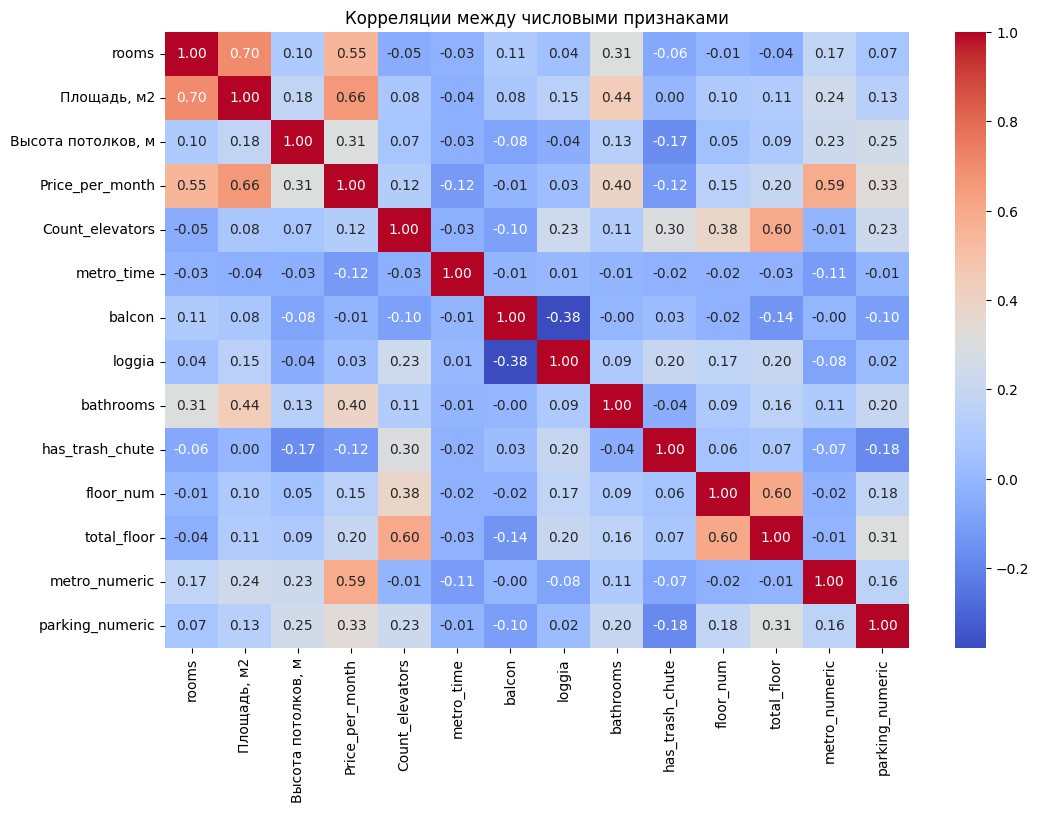

In [173]:
# выбираем только числовые колонки
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# строим корреляционную матрицу
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляции между числовыми признаками")
plt.show()

/tmp/ipykernel_8442/3643943461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rooms', data=df, palette='viridis')


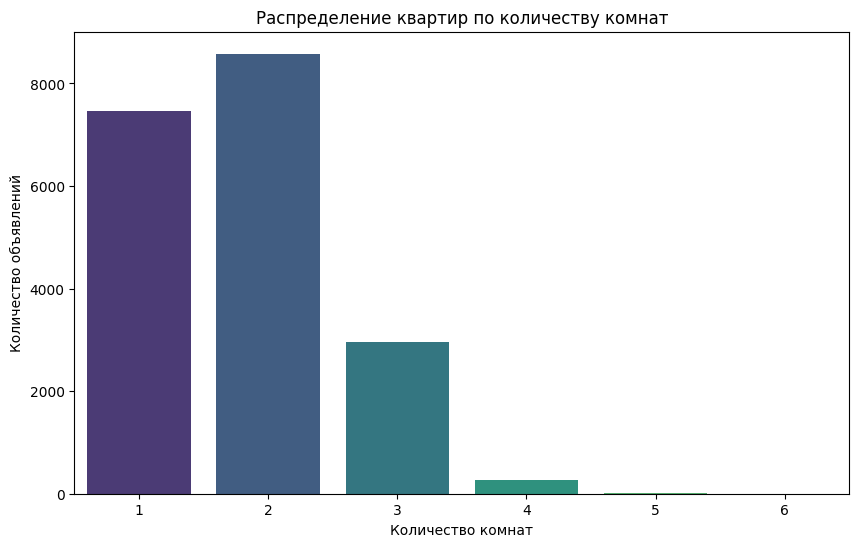

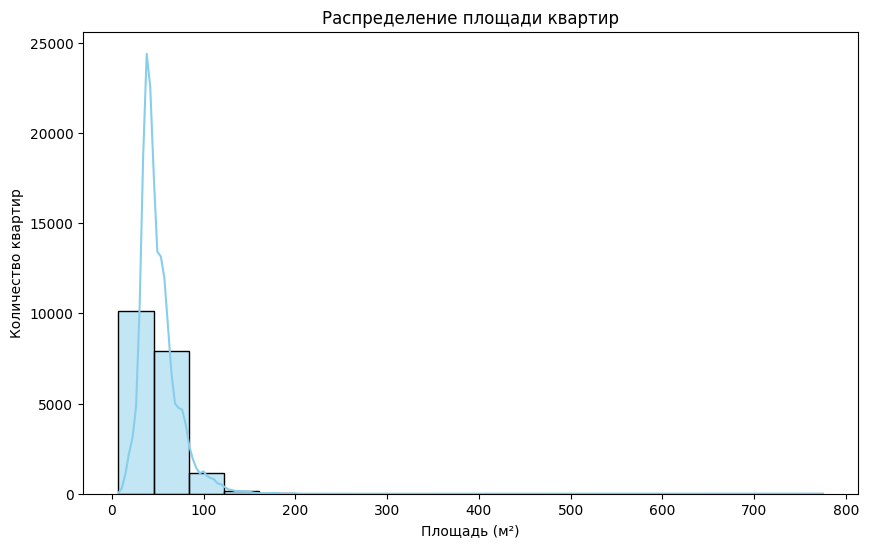

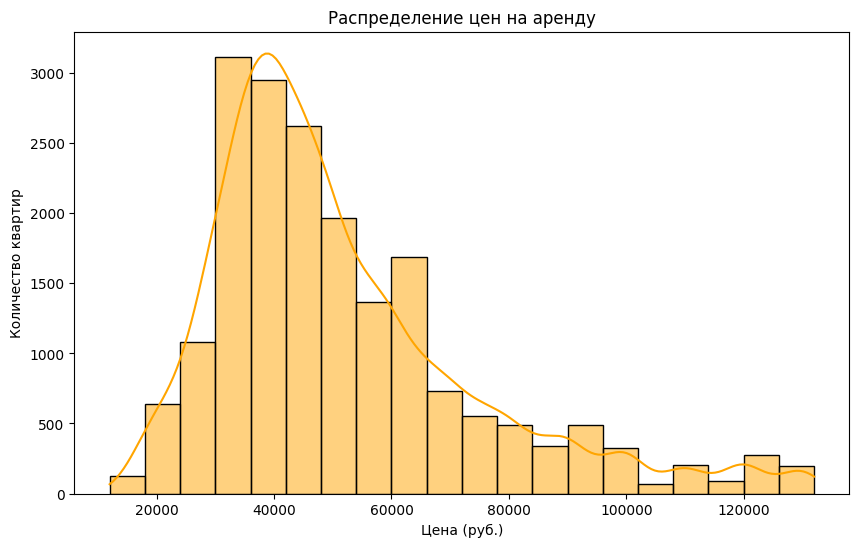

/tmp/ipykernel_8442/3643943461.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rooms', y='Price_per_month', data=df, ci=None, palette='magma')
/tmp/ipykernel_8442/3643943461.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rooms', y='Price_per_month', data=df, ci=None, palette='magma')


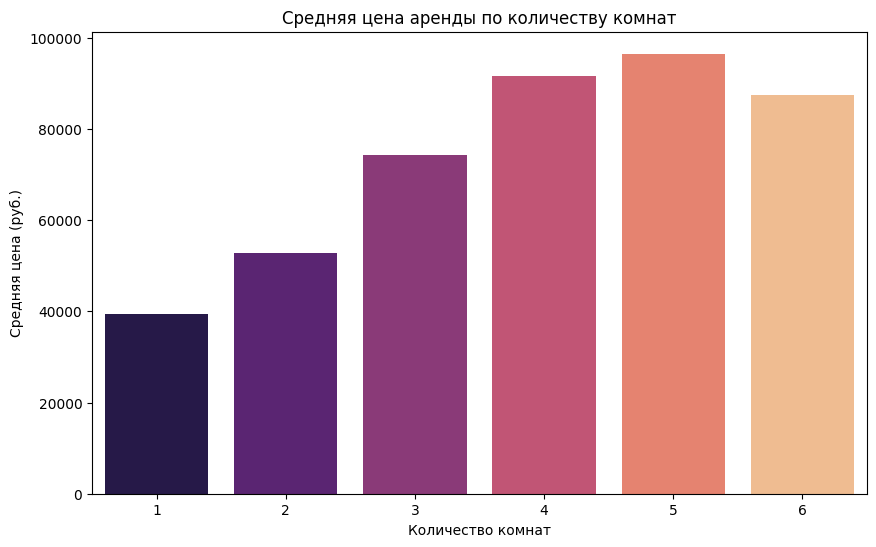

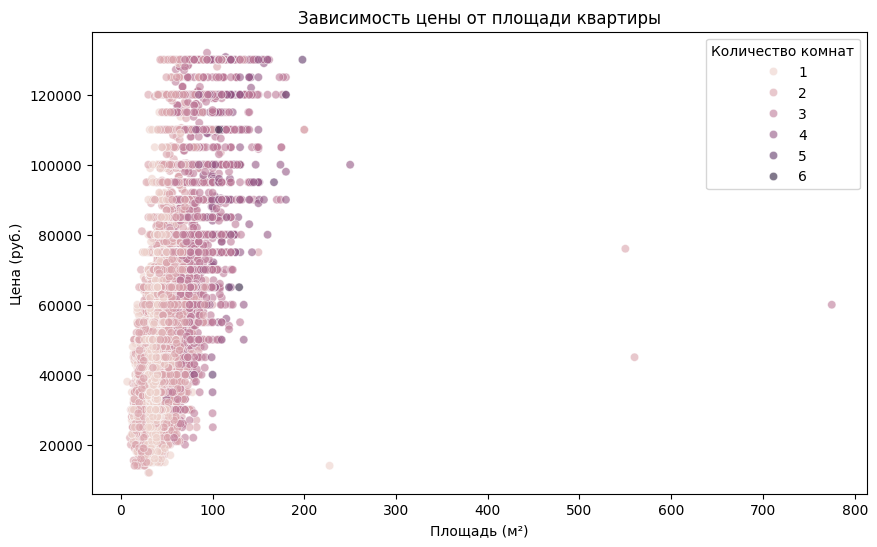

In [174]:
# 1. Распределение квартир по количеству комнат
plt.figure(figsize=(10, 6))
sns.countplot(x='rooms', data=df, palette='viridis')
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

# 2. Распределение площади квартир
plt.figure(figsize=(10, 6))
sns.histplot(df['Площадь, м2'], bins=20, kde=True, color='skyblue')
plt.title('Распределение площади квартир')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир')
plt.show()

# 3. Распределение цен на аренду
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_month'], bins=20, kde=True, color='orange')
plt.title('Распределение цен на аренду')
plt.xlabel('Цена (руб.)')
plt.ylabel('Количество квартир')
plt.show()

# 4. Распределение цен по количеству комнат
plt.figure(figsize=(10, 6))
sns.barplot(x='rooms', y='Price_per_month', data=df, ci=None, palette='magma')
plt.title('Средняя цена аренды по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена (руб.)')
plt.show()

# 5. Корреляция между площадью и ценой
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Площадь, м2', y='Price_per_month', data=df, hue='rooms', alpha=0.6)
plt.title('Зависимость цены от площади квартиры')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (руб.)')
plt.legend(title='Количество комнат')
plt.show()

### Графики зависимости от категориальных признаков

/tmp/ipykernel_8442/1114784341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ремонт', data=df, order=df['Ремонт'].value_counts().index, palette='plasma')


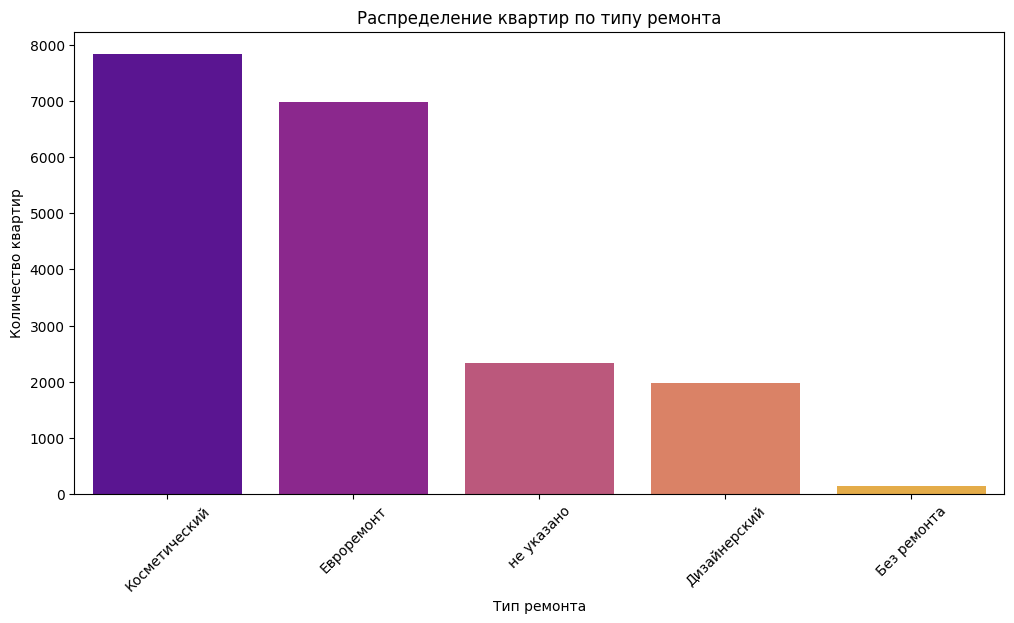

/tmp/ipykernel_8442/1114784341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


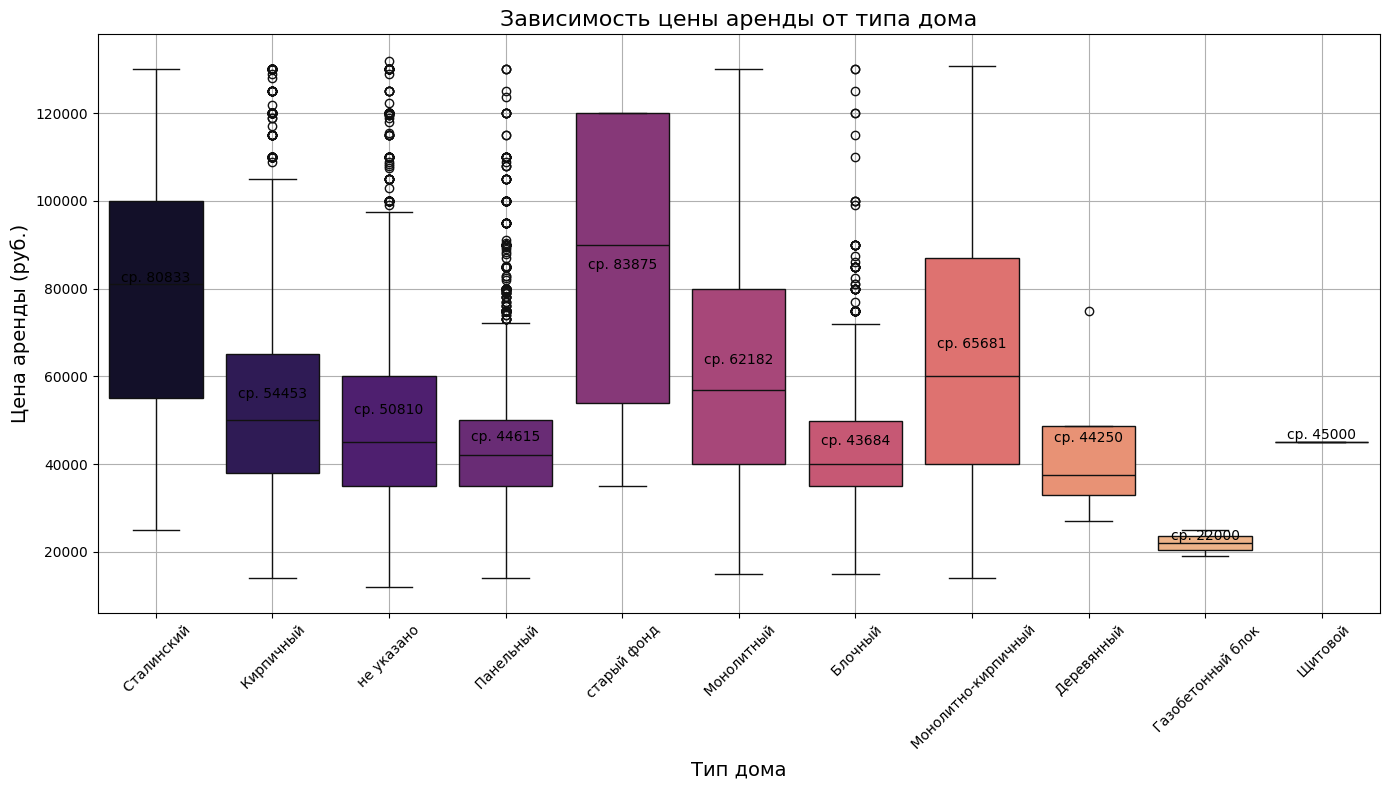

In [175]:
# 6. Распределение по типу ремонта
plt.figure(figsize=(12, 6))
sns.countplot(x='Ремонт', data=df, order=df['Ремонт'].value_counts().index, palette='plasma')
plt.title('Распределение квартир по типу ремонта')
plt.xlabel('Тип ремонта')
plt.ylabel('Количество квартир')
plt.xticks(rotation=45)
plt.show()

# 7. Зависимость цены от типа дома
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Wall material',  # Тип дома
    y='Price_per_month',  # Цена аренды
    data=df,
    palette='magma')

# Добавляем средние значения на график
for i, material in enumerate(df['Wall material'].unique()):
    avg_price = df[df['Wall material'] == material]['Price_per_month'].mean()
    plt.text(i, avg_price, f'ср. {avg_price:.0f}', 
             ha='center', va='bottom', color='black', fontsize=10)

# Оформляем график
plt.title('Зависимость цены аренды от типа дома', fontsize=16)
plt.xlabel('Тип дома', fontsize=14)
plt.ylabel('Цена аренды (руб.)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показываем график
plt.show()

/tmp/ipykernel_8442/4107395175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


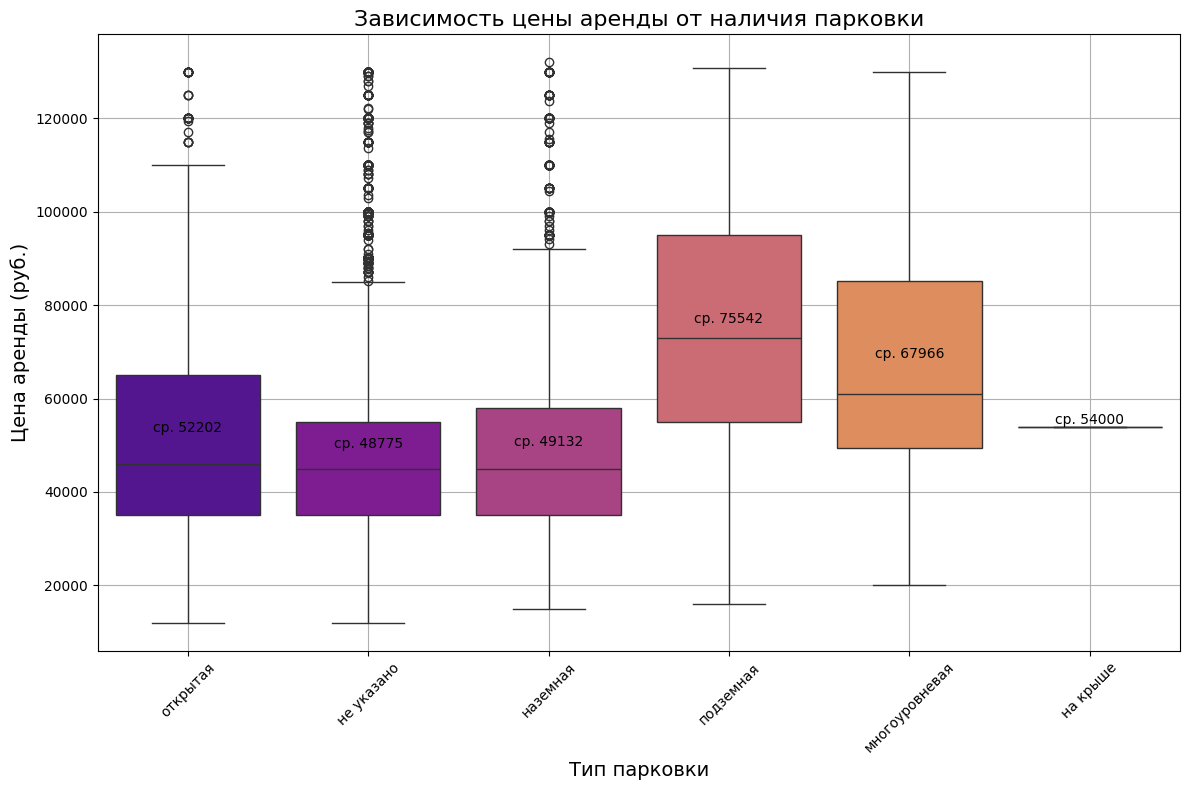

In [176]:
# 8. Зависимость цены аренды от наличия/вида парковки

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Парковка',  # Тип парковки
    y='Price_per_month',  # Цена аренды
    data=df,
    palette='plasma'
)

# Добавляем средние значения на график
for i, parking in enumerate(df['Парковка'].unique()):
    avg_price = df[df['Парковка'] == parking]['Price_per_month'].mean()
    plt.text(i, avg_price, f'ср. {avg_price:.0f}', 
            ha='center', va='bottom', color='black', fontsize=10)

# Оформляем график
plt.title('Зависимость цены аренды от наличия парковки', fontsize=16)
plt.xlabel('Тип парковки', fontsize=14)
plt.ylabel('Цена аренды (руб.)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показываем график
plt.show()

/tmp/ipykernel_8442/117366795.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_8442/117366795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


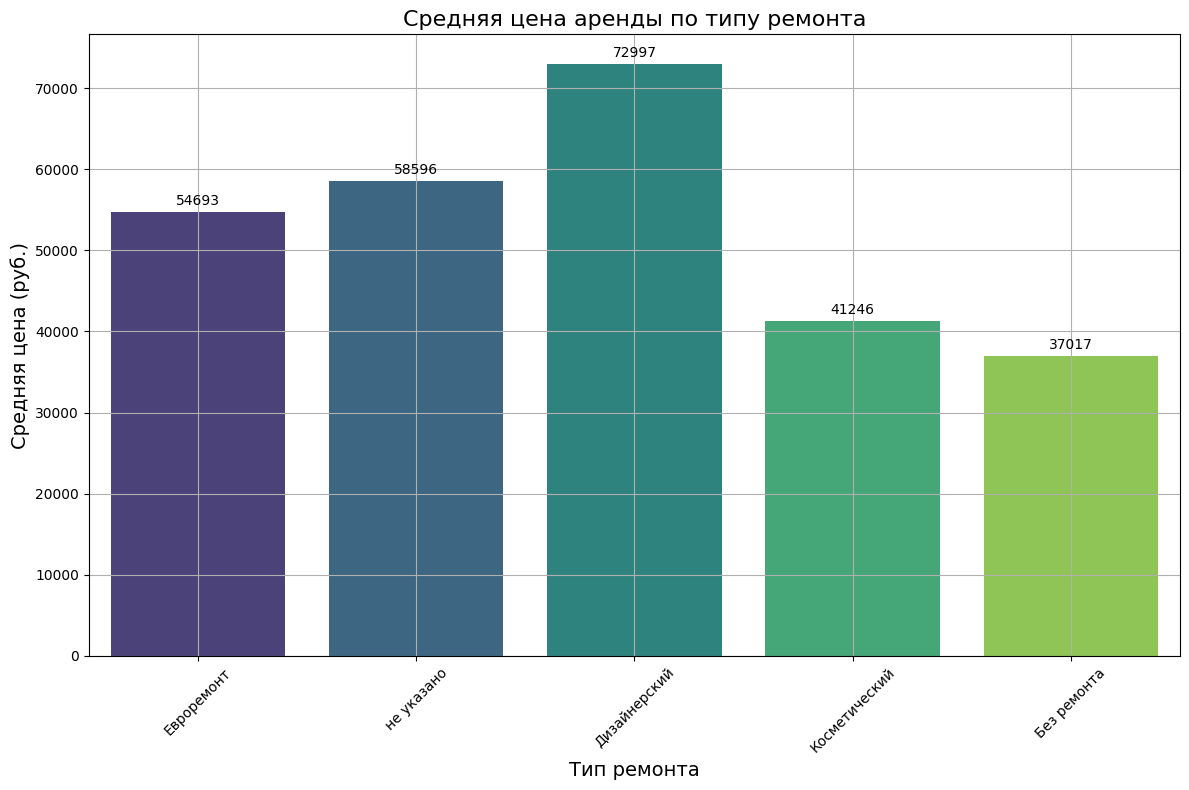

In [177]:
# 9. Зависимость стоимости аренды от типа ремонта

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Ремонт', 
    y='Price_per_month', 
    data=df,
    ci=None,  # убираем доверительные интервалы
    palette='viridis'
)

# Добавляем аннотации со средней ценой
for p in plt.gca().patches:
    height = p.get_height()
    plt.annotate(f'{"{:.0f}".format(height)}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # смещение текста
                textcoords="offset points",
                ha='center', va='bottom')

# Оформляем график
plt.title('Средняя цена аренды по типу ремонта', fontsize=16)
plt.xlabel('Тип ремонта', fontsize=14)
plt.ylabel('Средняя цена (руб.)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Показываем график
plt.show()

/tmp/ipykernel_8442/3144136729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


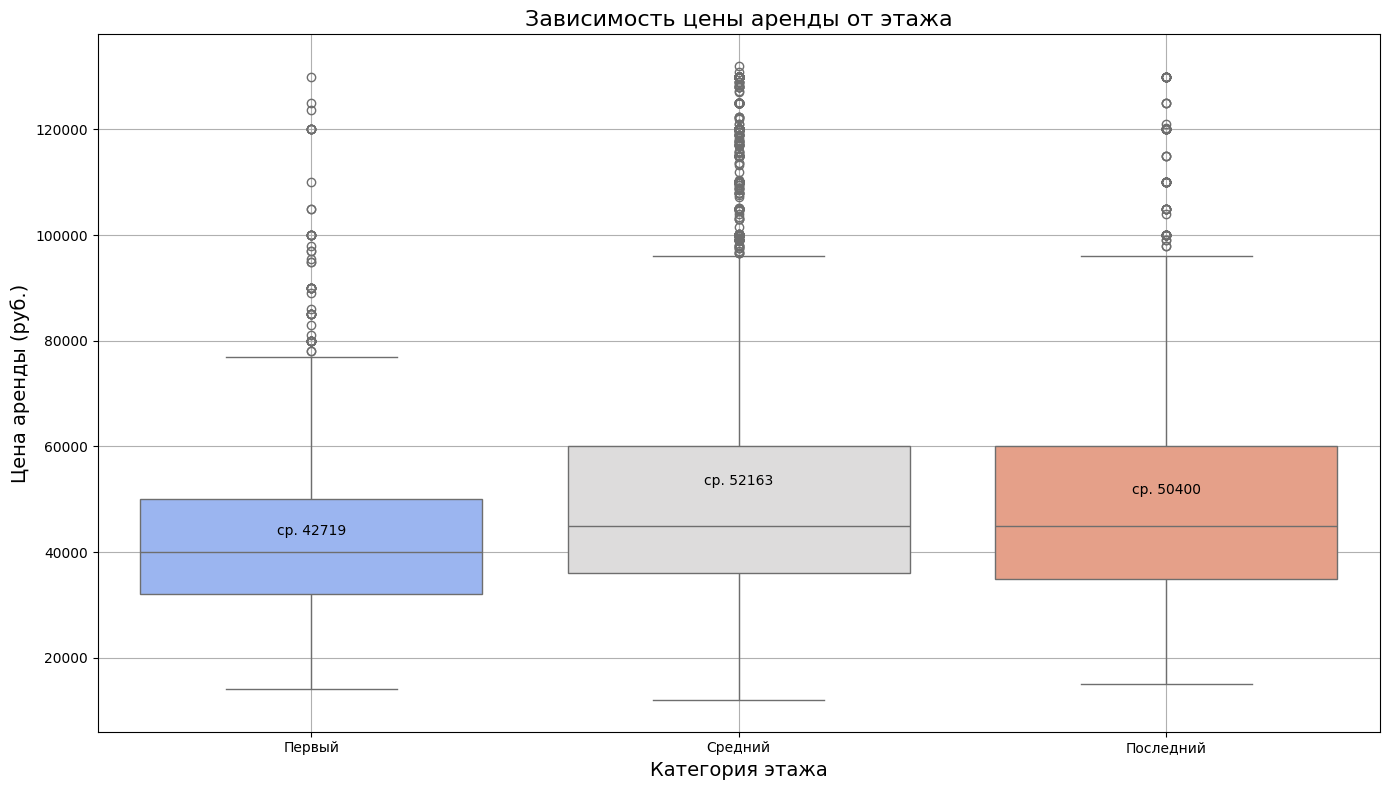

In [178]:
# 10. Зависимость цены аренды от этажа
df['Floor_category'] = df.apply(lambda row: 
    'Первый' if row['floor_num'] == 1 else
    'Последний' if row['floor_num'] == row['total_floor'] else
    'Средний', axis=1)

# Преобразуем цену в числовой формат
df['Price_per_month'] = pd.to_numeric(df['Price_per_month'], errors='coerce')

# Создаем график
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Floor_category',
    y='Price_per_month',
    data=df,
    order=['Первый', 'Средний', 'Последний'],
    palette='coolwarm'
)

# Добавляем средние значения
for i, category in enumerate(['Первый', 'Средний', 'Последний']):
    avg_price = df[df['Floor_category'] == category]['Price_per_month'].mean()
    plt.text(i, avg_price, f'ср. {avg_price:.0f}', 
            ha='center', va='bottom', color='black', fontsize=10)

# Оформляем график
plt.title('Зависимость цены аренды от этажа', fontsize=16)
plt.xlabel('Категория этажа', fontsize=14)
plt.ylabel('Цена аренды (руб.)', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Показываем график
plt.show()

#### на будущее для оценки верхний-первый этаж вводит числовой признак

In [179]:
# Создаем новый столбец с 0/1 значением
df['floor_type'] = df.apply(lambda row: 
    0 if (row['floor_num'] == 1) or 
       (row['floor_num'] == row['total_floor']) else 1, axis=1)

# Проверяем результат
print(df[['floor_num', 'total_floor', 'floor_type']])

                floor_num  total_floor  floor_type
ID  объявления                                    
273973191               5           10           1
273999490               4            8           1
274995950              19           26           1
271265359               5            6           1
273779074               3            6           1
...                   ...          ...         ...
215565511              10           14           1
274654844               5           18           1
268679909               5            5           0
274807525               8           23           1
274672243               6           23           1

[19300 rows x 3 columns]
